In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_data = "data/mouse_drug_data.csv"
clinical_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_data)
clinical_df = pd.read_csv(clinical_data)

# Combine the data into a single dataset
df = pd.merge(mouse_df, clinical_df)

# Display the data table for preview -- edited order of columns to match starter file
df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug"]].head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


In [3]:
# Tumor Response to Treatment

drug_timepoint_grouped_df = df.groupby(["Drug", "Timepoint"])

# this has a slightly different output than the starter file, but
# it's mostly just as readable and the values match (only displaying 5)
drug_timepoint_grouped_df[["Tumor Volume (mm3)"]].mean().head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [4]:
# Standard Error of Tumor Values

tumor_se = drug_timepoint_grouped_df[["Tumor Volume (mm3)"]].sem()

tumor_se.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [5]:
# Data munging

tumor_df = pd.pivot_table(df, index=["Timepoint"], columns=["Drug"])

tumor_df["Tumor Volume (mm3)"].head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


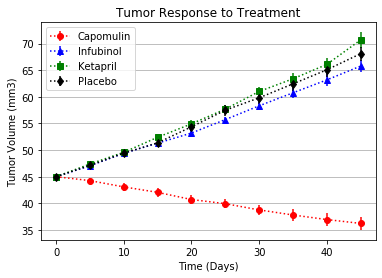

In [6]:
# Plot of Tumor Volume versus Treatments
capomulin_tumor = tumor_df["Tumor Volume (mm3)"]["Capomulin"]
infubinol_tumor = tumor_df["Tumor Volume (mm3)"]["Infubinol"]
ketapril_tumor = tumor_df["Tumor Volume (mm3)"]["Ketapril"]
placebo_tumor = tumor_df["Tumor Volume (mm3)"]["Placebo"]

plt.errorbar(capomulin_tumor.index, capomulin_tumor, yerr=tumor_se.loc["Capomulin"]["Tumor Volume (mm3)"], label="Capomulin", color="red", marker="o", linestyle=":")
plt.errorbar(infubinol_tumor.index, infubinol_tumor, yerr=tumor_se.loc["Infubinol"]["Tumor Volume (mm3)"], label="Infubinol", color="blue", marker="^", linestyle=":")
plt.errorbar(ketapril_tumor.index, ketapril_tumor, yerr=tumor_se.loc["Ketapril"]["Tumor Volume (mm3)"], label="Ketapril", color="green", marker="s", linestyle=":")
plt.errorbar(placebo_tumor.index, placebo_tumor, yerr=tumor_se.loc["Placebo"]["Tumor Volume (mm3)"], label="Placebo", color="black", marker="d", linestyle=":")

plt.grid(axis="y")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend()
plt.show()

In [7]:
# Metastatic Response to Treatment

pd.DataFrame(drug_timepoint_grouped_df["Metastatic Sites"].mean().head())

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Standard Error of Metastatic Sites

metastatic_se = pd.DataFrame(drug_timepoint_grouped_df["Metastatic Sites"].sem())

metastatic_se.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Data Munging

metastatic_df = pd.pivot_table(df, index=["Timepoint"], columns=["Drug"])

metastatic_df["Metastatic Sites"].head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


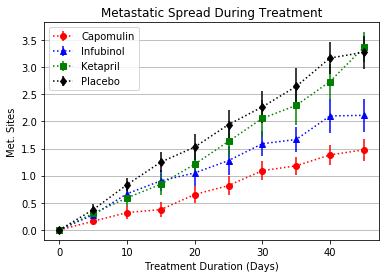

In [10]:
# Plot of Metastatic Sites versus Treatments
capomulin_ms = metastatic_df["Metastatic Sites"]["Capomulin"]
infubinol_ms = metastatic_df["Metastatic Sites"]["Infubinol"]
ketapril_ms = metastatic_df["Metastatic Sites"]["Ketapril"]
placebo_ms = metastatic_df["Metastatic Sites"]["Placebo"]


plt.errorbar(capomulin_ms.index, capomulin_ms, yerr=metastatic_se.loc["Capomulin"]["Metastatic Sites"], label="Capomulin", color="red", marker="o", linestyle=":")
plt.errorbar(infubinol_ms.index, infubinol_ms, yerr=metastatic_se.loc["Infubinol"]["Metastatic Sites"], label="Infubinol", color="blue", marker="^", linestyle=":")
plt.errorbar(ketapril_ms.index, ketapril_ms, yerr=metastatic_se.loc["Ketapril"]["Metastatic Sites"], label="Ketapril", color="green", marker="s", linestyle=":")
plt.errorbar(placebo_ms.index, placebo_ms, yerr=metastatic_se.loc["Placebo"]["Metastatic Sites"], label="Placebo", color="black", marker="d", linestyle=":")

plt.grid(axis="y")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

plt.legend()
plt.show()

In [11]:
# Mouse Count per Timepoint

mouse_df = pd.DataFrame(drug_timepoint_grouped_df["Mouse ID"].count())

mouse_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [12]:
# Data Munging

mouse_count_df = pd.pivot_table(mouse_df, index=["Timepoint"], columns=["Drug"])

mouse_count_df["Mouse ID"].head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


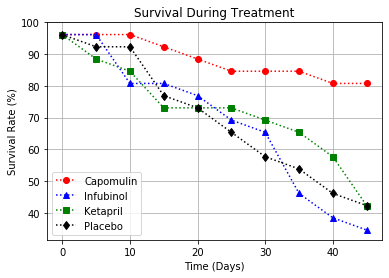

In [13]:
# Plot of Surviving Mice over Time

# Jury-rigged percent formatting for the y-axis. Couldn't find an easy module or method for it.
y_labels = (40, 50, 60, 70, 80, 90, 100)
y_values = []

while len(y_values) < len(y_labels):
    y_values.append(y_labels[len(y_values)]*.01*26)

plt.plot(mouse_count_df["Mouse ID"]["Capomulin"], label="Capomulin", color="red", marker="o", linestyle=":")
plt.plot(mouse_count_df["Mouse ID"]["Infubinol"], label="Infubinol", color="blue", marker="^", linestyle=":")
plt.plot(mouse_count_df["Mouse ID"]["Ketapril"], label="Ketapril", color="green", marker="s", linestyle=":")
plt.plot(mouse_count_df["Mouse ID"]["Placebo"], label="Placebo", color="black", marker="d", linestyle=":")

plt.grid()
plt.yticks(y_values, y_labels)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.legend()
plt.show()

In [14]:
# Summary Bar Graph
drug_ref = tumor_df["Tumor Volume (mm3)"]
drug_list = tumor_df["Tumor Volume (mm3)"].columns
pct_change_dict = {}

for drug in drug_list:
    # Looping through each unique drug and calculating percent change using its first timepoint [0] and last [45]
    pct_change = round((((drug_ref[drug][45] - drug_ref[drug][0])/drug_ref[drug][0])*100), 6)
    pct_change_dict.update({drug:pct_change})

pct_change_df = pd.DataFrame.from_dict([pct_change_dict])
pct_change_df.index = ["Percent Change"]
pct_change_df.transpose()

,Percent Change
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134
Zoniferol,46.579751


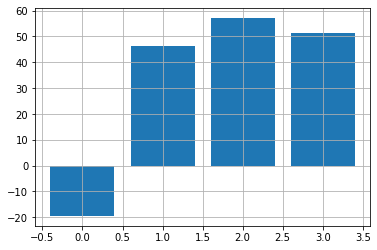

In [29]:
graph_data = pct_change_df.loc["Percent Change"]

bar_x_values = np.arange(0, 4)

bar_y_values = (
    graph_data["Capomulin"],
    graph_data["Infubinol"],
    graph_data["Ketapril"],
    graph_data["Placebo"]
)

plt.bar(bar_x_values, bar_y_values)

plt.grid()

plt.show()